<a href="https://colab.research.google.com/github/DanKingsleyAIandML/AI-and-ML-Projects/blob/main/CV_8__w_VGG16_full_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Computer Vision: Plant Seedlings Classification

Problem Statement

Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning. The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.

Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing images of unique plants belonging to 12 different species.

The dataset can be download from Olympus.

The data file names are:

images.npy
Labels.csv
Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

The goal of the project is to create a classifier capable of determining a plant's species from an image.

List of Species

Black-grass
Charlock
Cleavers
Common Chickweed
Common Wheat
Fat Hen
Loose Silky-bent
Maize
Scentless Mayweed
Shepherds Purse
Small-flowered Cranesbill
Sugar beet

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer
# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau
import random
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [ ]:
# Mount drive for  google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the image file of dataset
images = np.load('/content/drive/MyDrive/images.npy')      # Complete the code to read the dataset

# Load the labels file of dataset
labels = pd.read_csv('/content/drive/MyDrive/Labels.csv')  # Complete the code to read the dataset

## Data Overview

### Understand the shape of the dataset

In [ ]:
print(images.shape)         # Complete the code to check the shape
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Small-flowered Cranesbill'),
  Text(1, 0, 'Fat Hen'),
  Text(2, 0, 'Shepherds Purse'),
  Text(3, 0, 'Common wheat'),
  Text(4, 0, 'Common Chickweed'),
  Text(5, 0, 'Charlock'),
  Text(6, 0, 'Cleavers'),
  Text(7, 0, 'Scentless Mayweed'),
  Text(8, 0, 'Sugar beet'),
  Text(9, 0, 'Maize'),
  Text(10, 0, 'Black-grass'),
  Text(11, 0, 'Loose Silky-bent')])

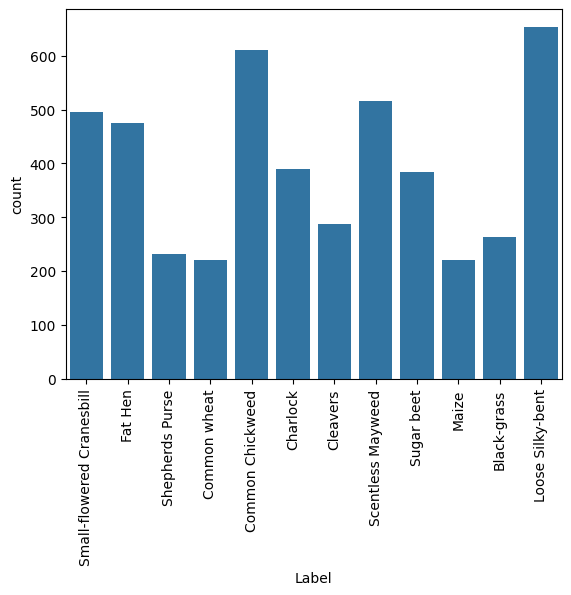

In [ ]:
sns.countplot(x=labels['Label'])            # Complete the code to check for data imbalance
plt.xticks(rotation='vertical')

## Data Pre-Processing

Balancing the data set

Code for Balancing the Frequency of Images in the Data Set

Plotting the data Set after balancing too Confirm Balance

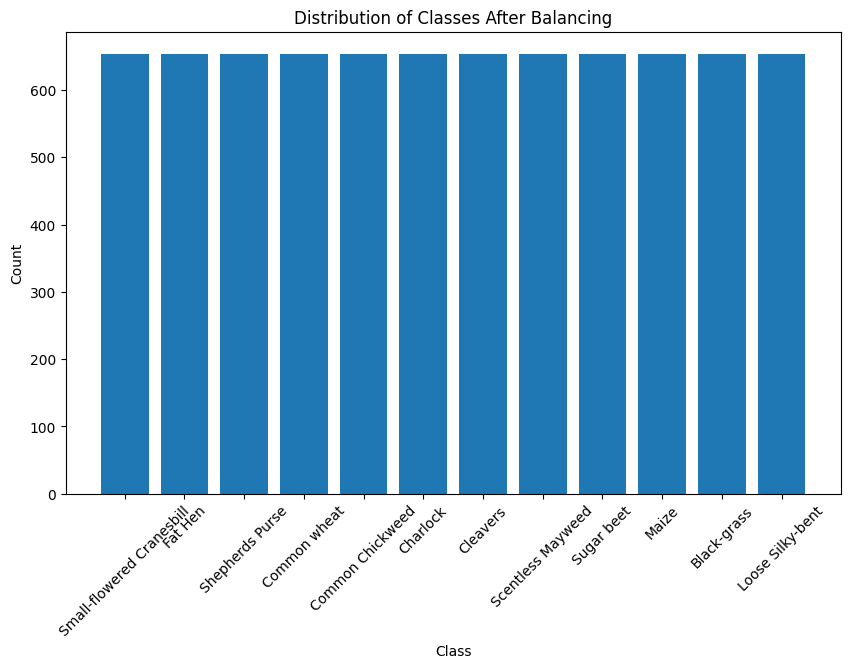

In [ ]:
##Ran Should Irun this code

# Plot the class distribution after balancing
plt.figure(figsize=(10, 6))
plt.bar(class_distribution_after.keys(), class_distribution_after.values())
plt.title('Distribution of Classes After Balancing')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Convert the BGR images to RGB images and Resize

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

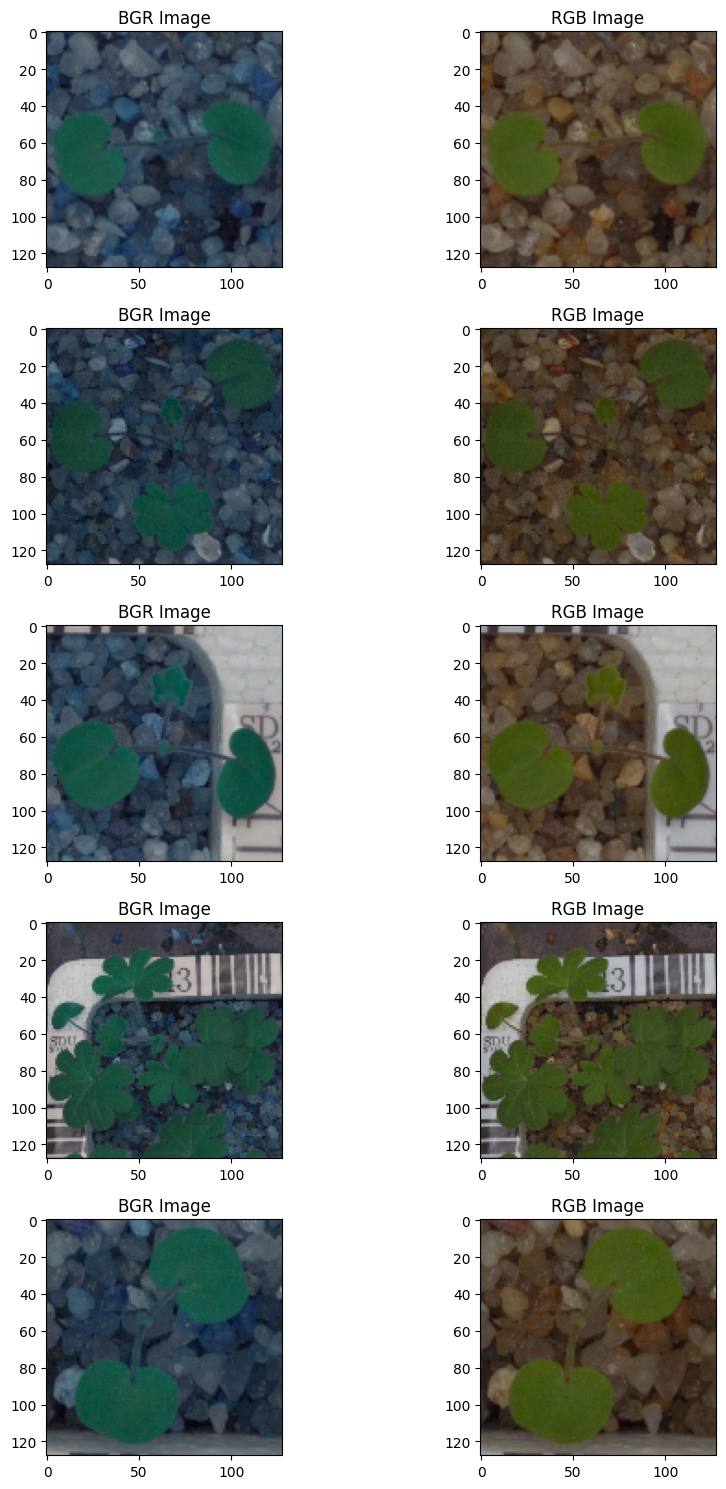

In [ ]:
###New code to convert to RGB format

import cv2
import matplotlib.pyplot as plt

# Convert the images to RGB format
rgb_images = []
for image in images:
    rgb_images.append(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Plot a few samples of BGR and RGB images side by side
num_samples = 5
fig, axes = plt.subplots(num_samples, 2, figsize=(10, 3*num_samples))
for i in range(num_samples):
    axes[i, 0].imshow(images[i])  # Plot BGR image
    axes[i, 0].set_title('BGR Image')
    axes[i, 1].imshow(rgb_images[i])  # Plot RGB image
    axes[i, 1].set_title('RGB Image')
plt.tight_layout()
plt.show()

# Resize RGB images
images_decreased = []
height = 64
width = 64
dimensions = (width, height)
for i in range(len(rgb_images)):
    images_decreased.append(cv2.resize(rgb_images[i], dimensions, interpolation=cv2.INTER_LINEAR))

Confirming that images were resized to 64 x 64

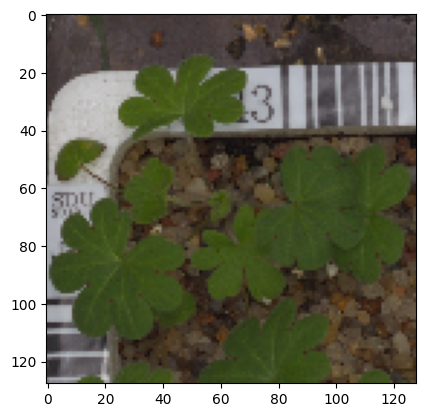

In [ ]:
plt.imshow(rgb_images[3])

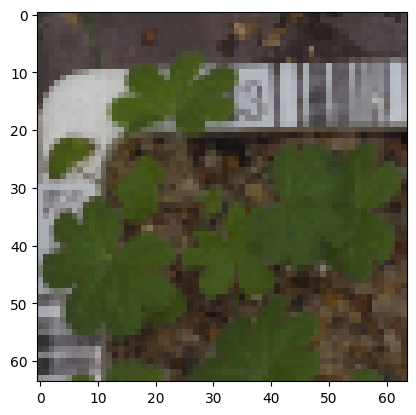

In [ ]:
plt.imshow(images_decreased[3])

### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into test set
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased), labels, test_size=0.1, random_state=42, stratify=labels)

# Split the remaining data into train and validation sets
test_val_split_size = 0.5  # 50-50 split for validation and test sets
X_train, X_temp_2, y_train, y_temp_2 = train_test_split(X_temp, y_temp, test_size=test_val_split_size, random_state=42, stratify=y_temp)

# Split the remaining data into equal-sized validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp_2, y_temp_2, test_size=0.5, random_state=42, stratify=y_temp_2)

In [ ]:
# Print the shapes of the resulting datasets
print("Training data shape:", X_train.shape, y_train.shape)
print("Validation data shape:", X_val.shape, y_val.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (2137, 64, 64, 3) (2137, 1)
Validation data shape: (1069, 64, 64, 3) (1069, 1)
Testing data shape: (1069, 64, 64, 3) (1069, 1)


Encode the target variables

In [ ]:
from sklearn.preprocessing import LabelBinarizer

# Initialize LabelBinarizer
enc = LabelBinarizer()

# Fit and transform y_train
y_train_encoded = enc.fit_transform(y_train)

# Transform y_val
y_val_encoded = enc.transform(y_val)

# Transform y_test
y_test_encoded = enc.transform(y_test)

Checking the shape of the encoded labels

In [ ]:
new_var = print(y_train_encoded.shape, y_val_encoded.shape, y_test_encoded.shape)

(2137, 12) (1069, 12) (1069, 12)


### Data Normalization

In [ ]:
X_train_normalized = X_train.astype('float32') / 255.0
X_val_normalized = X_val.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0

## Model Building

Clearing backend data

In [ ]:
# Clearing backend
backend.clear_session()

Fixing the random number generator seed

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

Sequential model building

In [ ]:
# Initialize the model
model1 = Sequential()

# Add the first convolutional layer
model1.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Add max pooling layer
model1.add(MaxPooling2D((2, 2), padding='same'))

# Add second convolutional layer
model1.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding='same'))

# Add third convolutional layer
model1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding='same'))

# Flatten the output of the convolutional layers
model1.add(Flatten())

# Add a fully connected dense layer
model1.add(Dense(16, activation='relu'))
model1.add(Dropout(0.3))

# Add the output layer
model1.add(Dense(12, activation='softmax'))

# Define the optimizer
opt = Adam()

# Compile the model
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generate the summary of the model
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 32, 32, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 8, 8, 32)         

Fitting the model on the train data

In [ ]:
history_1 = model1.fit(
    X_train_normalized, y_train_encoded,
    epochs=30,
    validation_data=(X_val_normalized, y_val_encoded),
    batch_size=32,
    verbose=2
)

Epoch 1/30
67/67 - 7s - loss: 2.4634 - accuracy: 0.1235 - val_loss: 2.4597 - val_accuracy: 0.1506 - 7s/epoch - 102ms/step
Epoch 2/30
67/67 - 1s - loss: 2.3770 - accuracy: 0.1769 - val_loss: 2.2080 - val_accuracy: 0.2788 - 569ms/epoch - 8ms/step
Epoch 3/30
67/67 - 1s - loss: 2.1811 - accuracy: 0.2620 - val_loss: 2.0373 - val_accuracy: 0.2806 - 570ms/epoch - 9ms/step
Epoch 4/30
67/67 - 1s - loss: 2.0379 - accuracy: 0.3074 - val_loss: 1.8621 - val_accuracy: 0.3751 - 570ms/epoch - 9ms/step
Epoch 5/30
67/67 - 1s - loss: 1.9238 - accuracy: 0.3510 - val_loss: 1.7531 - val_accuracy: 0.4350 - 572ms/epoch - 9ms/step
Epoch 6/30
67/67 - 1s - loss: 1.8360 - accuracy: 0.3856 - val_loss: 1.6369 - val_accuracy: 0.4434 - 567ms/epoch - 8ms/step
Epoch 7/30
67/67 - 1s - loss: 1.7260 - accuracy: 0.4197 - val_loss: 1.5822 - val_accuracy: 0.5042 - 590ms/epoch - 9ms/step
Epoch 8/30
67/67 - 1s - loss: 1.6512 - accuracy: 0.4300 - val_loss: 1.4257 - val_accuracy: 0.5379 - 569ms/epoch - 8ms/step
Epoch 9/30
67/67 

Model evaluation

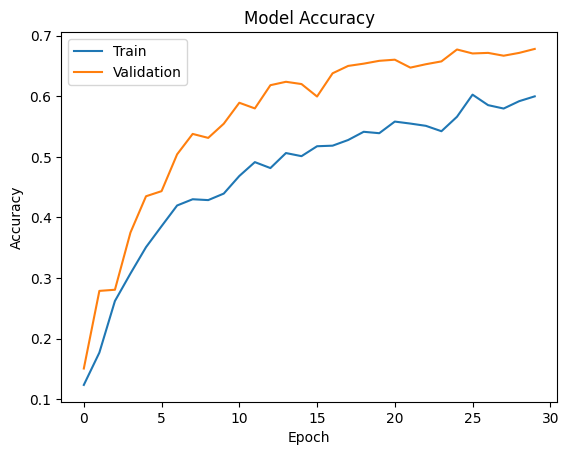

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Model accuracy on test data

In [ ]:
accuracy = model1.evaluate(X_test_normalized, y_test_encoded, verbose=2)

34/34 - 0s - loss: 2.4792 - accuracy: 0.1282 - 361ms/epoch - 11ms/step


Predicting probabilities

In [ ]:
y_pred = model1.predict(X_test_normalized)
y_pred = model1.predict(X_val_normalized)




34/34 [==============================] - 0s 3ms/step


Plotting Confusion Matrix

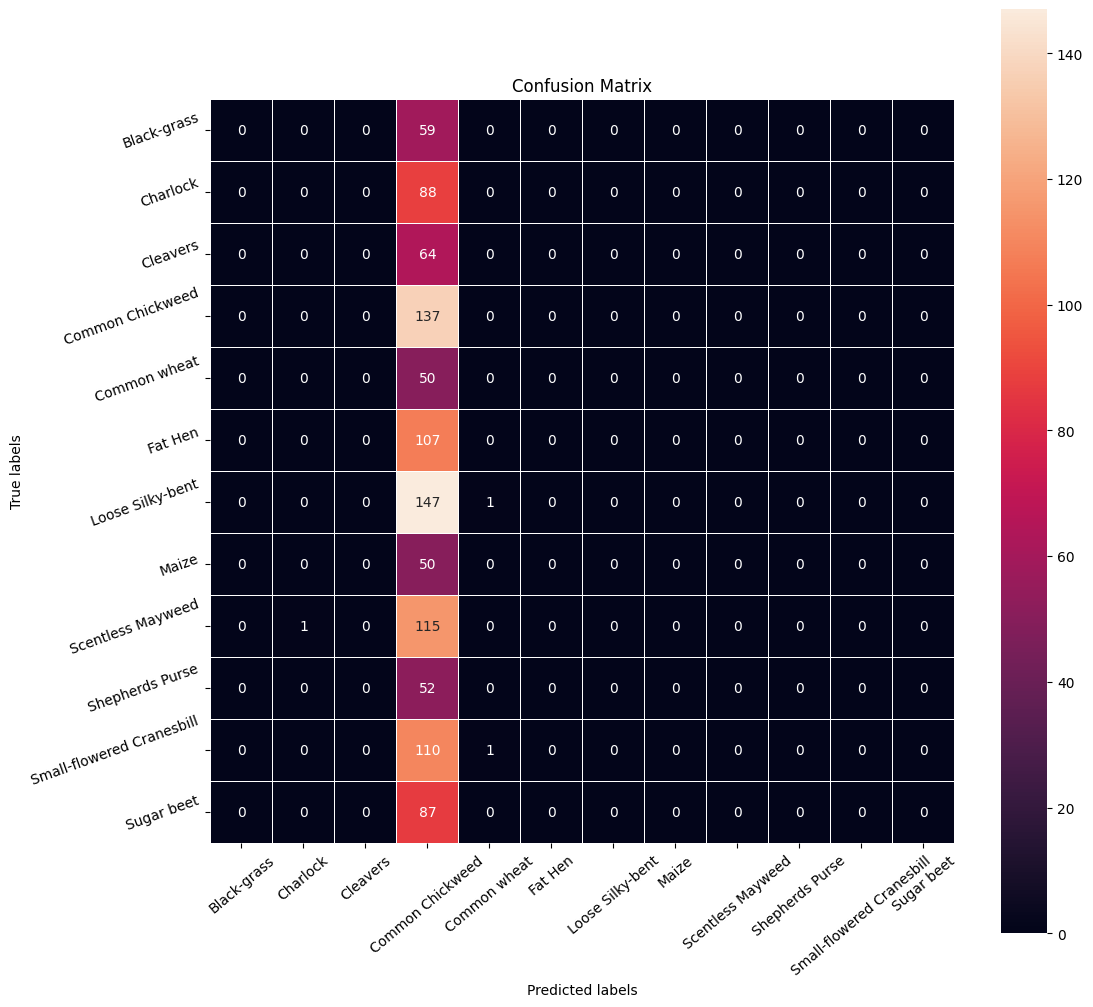

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred)
y_pred_arg = np.argmax(y_pred, axis=1)
y_test_arg = np.argmax(y_test_encoded, axis=1)

# Plotting the Confusion Matrix using confusion matrix() function
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)

# Plotting the Confusion Matrix
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(list(enc.classes_), rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_), rotation=20)
plt.show()

Plotting Classification Report

In [ ]:
from sklearn import metrics

In [ ]:
# Plotting the classification report
cr = metrics.classification_report(y_test_arg, y_pred_arg)  # Complete the code to plot the classification report
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.00      0.00      0.00        88
           2       0.00      0.00      0.00        64
           3       0.13      1.00      0.23       137
           4       0.00      0.00      0.00        50
           5       0.00      0.00      0.00       107
           6       0.00      0.00      0.00       148
           7       0.00      0.00      0.00        50
           8       0.00      0.00      0.00       116
           9       0.00      0.00      0.00        52
          10       0.00      0.00      0.00       111
          11       0.00      0.00      0.00        87

    accuracy                           0.13      1069
   macro avg       0.01      0.08      0.02      1069
weighted avg       0.02      0.13      0.03      1069



Fitting the model to the testing data

## Model Performance Improvement

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [ ]:
# Code to monitor val_accuracy
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    fill_mode='nearest'
)

Initializing 2nd sequential model

In [ ]:
# Intializing a sequential model
model2 = Sequential()

# Adding the first convolutional layer with 64 filters, kernel size 3x3, and ReLU activation
model2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling layer to reduce the size of the output
model2.add(MaxPooling2D((2, 2), padding='same'))

# Adding another convolutional layer with 32 filters, kernel size 3x3, and ReLU activation
model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))

# Adding max pooling layer to reduce the size of the output
model2.add(MaxPooling2D((2, 2), padding='same'))

# Adding batch normalization layer
model2.add(BatchNormalization())

# Flattening the output of the convolutional layer
model2.add(Flatten())

# Adding a fully connected dense layer with 16 neurons and ReLU activation
model2.add(Dense(16, activation='relu'))

# Adding dropout layer with dropout rate 0.3
model2.add(Dropout(0.3))

# Adding the output layer with 12 neurons (for 12 classes) and softmax activation
model2.add(Dense(12, activation='softmax'))

# Initializing Adam Optimizer
opt = Adam()

# Compiling the model
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                                  
                                                        

Fitting the model on the train data

In [ ]:
# Epochs
epochs = 30
# Batch size
batch_size = 64

history = model2.fit(train_datagen.flow(X_train_normalized, y_train_encoded,
                                         batch_size=batch_size,
                                         shuffle=False),
                     epochs=epochs,
                     steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                     validation_data=(X_val_normalized, y_val_encoded),
                     verbose=1,
                     callbacks=[learning_rate_reduction])

Epoch 1/30
33/33 [==============================] - 4s 75ms/step - loss: 2.3008 - accuracy: 0.1843 - val_loss: 2.4521 - val_accuracy: 0.1319 - lr: 0.0010
Epoch 2/30
33/33 [==============================] - 2s 70ms/step - loss: 1.9024 - accuracy: 0.3256 - val_loss: 2.3684 - val_accuracy: 0.2264 - lr: 0.0010
Epoch 3/30
33/33 [==============================] - 2s 70ms/step - loss: 1.7454 - accuracy: 0.3705 - val_loss: 2.3730 - val_accuracy: 0.1693 - lr: 0.0010
Epoch 4/30
33/33 [==============================] - 2s 72ms/step - loss: 1.6324 - accuracy: 0.4158 - val_loss: 2.2910 - val_accuracy: 0.3779 - lr: 0.0010
Epoch 5/30
33/33 [==============================] - 2s 70ms/step - loss: 1.4941 - accuracy: 0.4752 - val_loss: 2.2304 - val_accuracy: 0.3957 - lr: 0.0010
Epoch 6/30
33/33 [==============================] - 2s 69ms/step - loss: 1.4142 - accuracy: 0.4978 - val_loss: 2.1154 - val_accuracy: 0.3630 - lr: 0.0010
Epoch 7/30
33/33 [==============================] - 2s 70ms/step - loss: 1.4

Model Evaluation

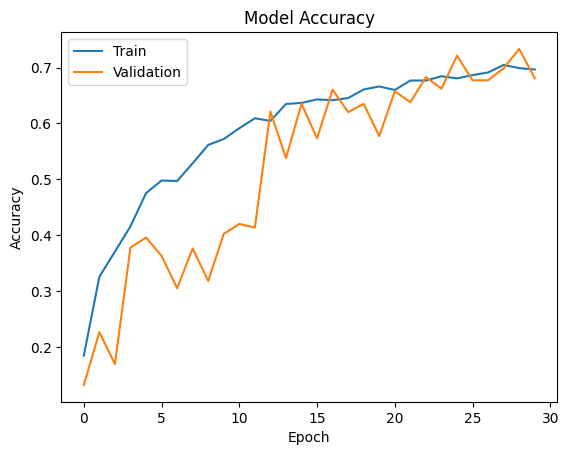

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Test Data model2 accuracy

In [ ]:
accuracy = model2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

34/34 - 0s - loss: 1.1319 - accuracy: 0.6595 - 102ms/epoch - 3ms/step


Confusion matrix

In [ ]:
y_pred = model2.predict(X_test_normalized)

34/34 [==============================] - 0s 2ms/step


In [ ]:
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)

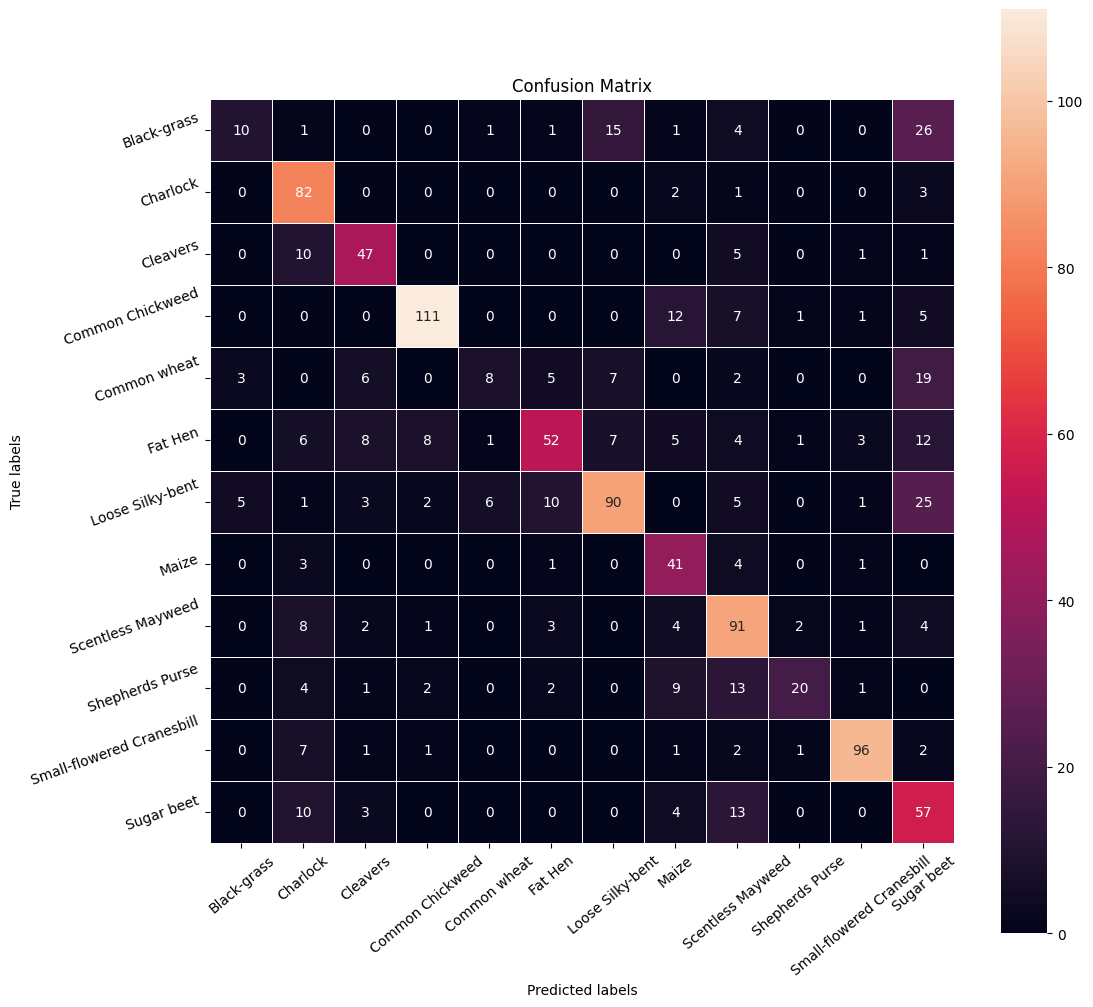

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg = np.argmax(y_pred, axis=1)
y_test_arg = np.argmax(y_test_encoded, axis=1)

# Plotting the Confusion Matrix using confusion matrix() function
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)

# Plotting the Confusion Matrix
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(list(enc.classes_), rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_), rotation=20)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# Plotting the classification report
cr = classification_report(y_test_arg, y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.56      0.17      0.26        59
           1       0.62      0.93      0.75        88
           2       0.66      0.73      0.70        64
           3       0.89      0.81      0.85       137
           4       0.50      0.16      0.24        50
           5       0.70      0.49      0.57       107
           6       0.76      0.61      0.67       148
           7       0.52      0.82      0.64        50
           8       0.60      0.78      0.68       116
           9       0.80      0.38      0.52        52
          10       0.91      0.86      0.89       111
          11       0.37      0.66      0.47        87

    accuracy                           0.66      1069
   macro avg       0.66      0.62      0.60      1069
weighted avg       0.69      0.66      0.65      1069



# Model Transfer Learning VGG16

Clearing the back end

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

Initializing 3rd sequential model using VGG16 Transfer

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze the layers in the base VGG16 model
for layer in base_model.layers:
    layer.trainable = False

# Add your own classifier layers on top
x = Flatten()(base_model.output)
x = Dense(16, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(12, activation='softmax')(x)

# Create the model
model3 = Model(inputs=base_model.input, outputs=output)

# Define the optimizer
opt = Adam()

# Compile the model
model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generate the summary of the model
model3.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

Fitting the data to the model

In [ ]:
history_3 = model3.fit(
    X_train_normalized, y_train_encoded,
    epochs=30,
    validation_data=(X_val_normalized, y_val_encoded),
    batch_size=32,
    verbose=2
)

Epoch 1/30
67/67 - 4s - loss: 2.4462 - accuracy: 0.1338 - val_loss: 2.3991 - val_accuracy: 0.1590 - 4s/epoch - 55ms/step
Epoch 2/30
67/67 - 1s - loss: 2.3603 - accuracy: 0.1675 - val_loss: 2.3292 - val_accuracy: 0.2816 - 871ms/epoch - 13ms/step
Epoch 3/30
67/67 - 1s - loss: 2.2918 - accuracy: 0.2307 - val_loss: 2.2446 - val_accuracy: 0.3003 - 868ms/epoch - 13ms/step
Epoch 4/30
67/67 - 1s - loss: 2.2239 - accuracy: 0.2569 - val_loss: 2.1550 - val_accuracy: 0.3293 - 864ms/epoch - 13ms/step
Epoch 5/30
67/67 - 1s - loss: 2.1498 - accuracy: 0.2667 - val_loss: 2.0429 - val_accuracy: 0.3265 - 859ms/epoch - 13ms/step
Epoch 6/30
67/67 - 1s - loss: 2.0929 - accuracy: 0.2789 - val_loss: 2.0137 - val_accuracy: 0.3143 - 870ms/epoch - 13ms/step
Epoch 7/30
67/67 - 1s - loss: 2.0664 - accuracy: 0.2681 - val_loss: 1.9557 - val_accuracy: 0.3536 - 860ms/epoch - 13ms/step
Epoch 8/30
67/67 - 1s - loss: 2.0197 - accuracy: 0.2780 - val_loss: 1.9165 - val_accuracy: 0.3732 - 866ms/epoch - 13ms/step
Epoch 9/30


Model Evaluation

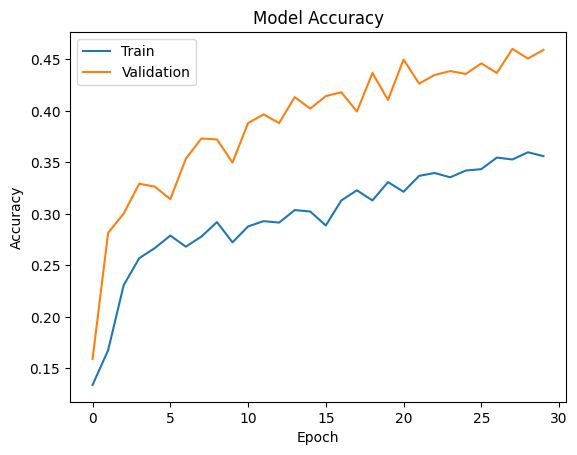

In [ ]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Model 3 with VGG16 Transefer accuraccy

In [ ]:
accuracy = model3.evaluate(X_test_normalized, y_test_encoded, verbose=2)

34/34 - 0s - loss: 1.5750 - accuracy: 0.4612 - 293ms/epoch - 9ms/step


Plotting the Confussion Matrix

In [ ]:
y_pred = model3.predict(X_test_normalized)

34/34 [==============================] - 0s 7ms/step


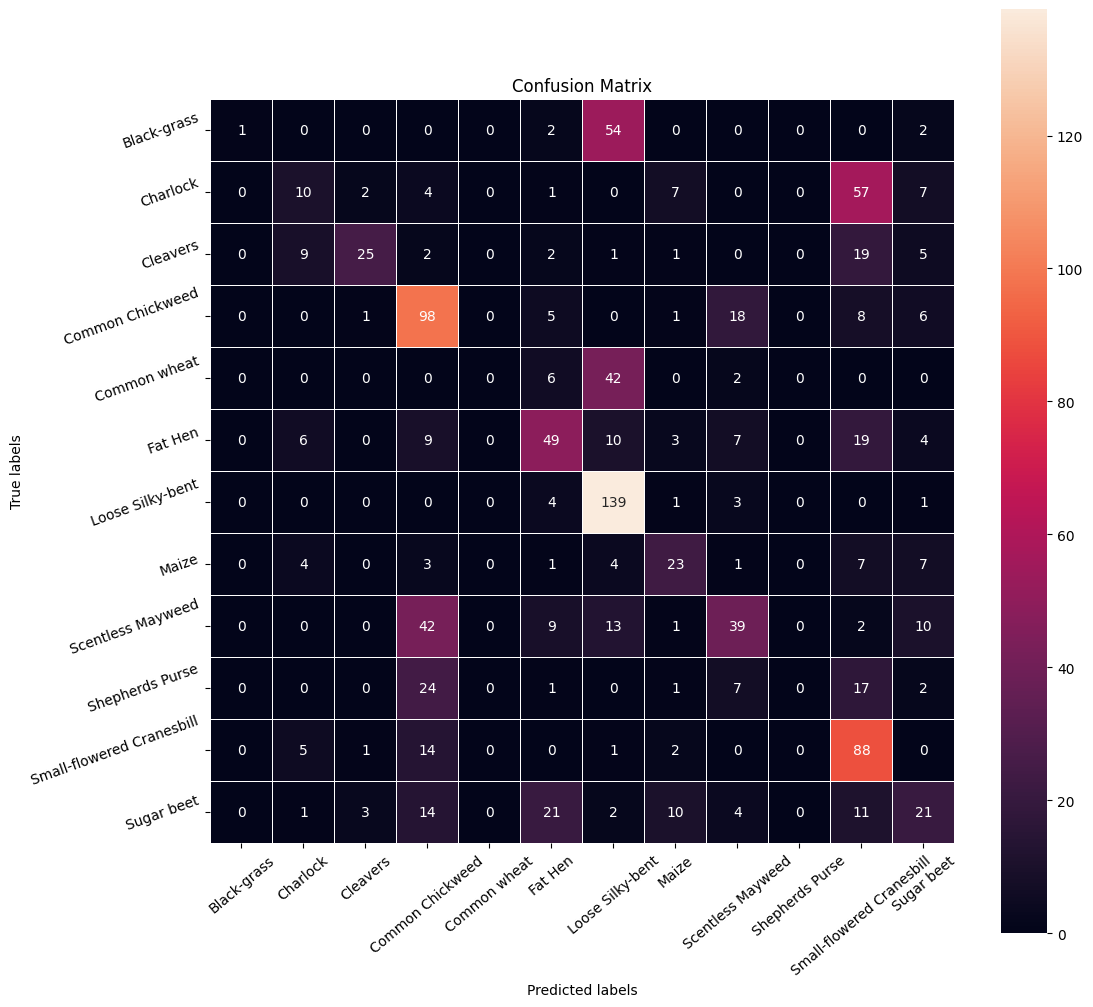

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg = np.argmax(y_pred, axis=1)
y_test_arg = np.argmax(y_test_encoded, axis=1)

# Plotting the Confusion Matrix using confusion matrix() function
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)

# Plotting the Confusion Matrix
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(list(enc.classes_), rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_), rotation=20)
plt.show()

Classification Report

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# Plotting the classification report
cr = classification_report(y_test_arg, y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.02      0.03        59
           1       0.29      0.11      0.16        88
           2       0.78      0.39      0.52        64
           3       0.47      0.72      0.56       137
           4       0.00      0.00      0.00        50
           5       0.49      0.46      0.47       107
           6       0.52      0.94      0.67       148
           7       0.46      0.46      0.46        50
           8       0.48      0.34      0.40       116
           9       0.00      0.00      0.00        52
          10       0.39      0.79      0.52       111
          11       0.32      0.24      0.28        87

    accuracy                           0.46      1069
   macro avg       0.43      0.37      0.34      1069
weighted avg       0.45      0.46      0.40      1069



## Final Model

Comment on the final model you have selected and use the same in the below code to visualize the image.

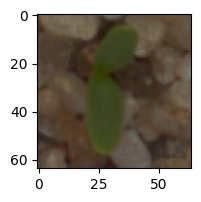

1/1 [==============================] - 0s 176ms/step
Predicted Label: ['Cleavers']
True Label: Sugar beet


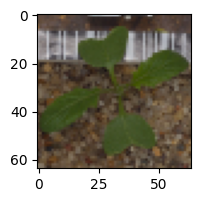

1/1 [==============================] - 0s 20ms/step
Predicted Label: ['Charlock']
True Label: Charlock


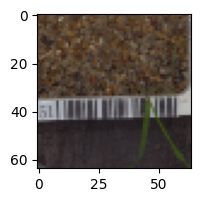

1/1 [==============================] - 0s 20ms/step
Predicted Label: ['Sugar beet']
True Label: Black-grass


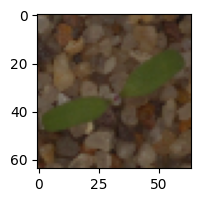

1/1 [==============================] - 0s 21ms/step
Predicted Label: ['Fat Hen']
True Label: Fat Hen


In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label:', enc.inverse_transform(model2.predict(X_test_normalized[2].reshape(1,64,64,3))))
print('True Label:', enc.inverse_transform(y_test_encoded)[2])

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label:', enc.inverse_transform(model2.predict(X_test_normalized[33].reshape(1,64,64,3))))
print('True Label:', enc.inverse_transform(y_test_encoded)[33])

plt.figure(figsize=(2,2))
plt.imshow(X_test[59])
plt.show()
print('Predicted Label:', enc.inverse_transform(model2.predict(X_test_normalized[59].reshape(1,64,64,3))))
print('True Label:', enc.inverse_transform(y_test_encoded)[59])

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label:', enc.inverse_transform(model2.predict(X_test_normalized[36].reshape(1,64,64,3))))
print('True Label:', enc.inverse_transform(y_test_encoded)[36])

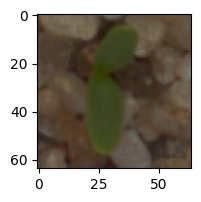

1/1 [==============================] - 0s 22ms/step
Predicted Label: ['Cleavers']
True Label: Sugar beet


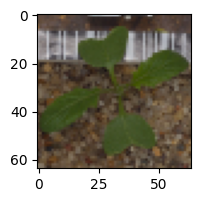

1/1 [==============================] - 0s 20ms/step
Predicted Label: ['Charlock']
True Label: Charlock


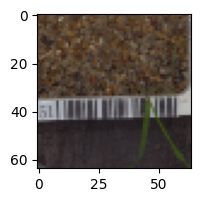

1/1 [==============================] - 0s 19ms/step
Predicted Label: ['Sugar beet']
True Label: Black-grass


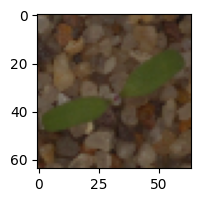

1/1 [==============================] - 0s 20ms/step
Predicted Label: ['Fat Hen']
True Label: Fat Hen


In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label:', enc.inverse_transform(model2.predict(X_test_normalized[2].reshape(1,64,64,3))))
print('True Label:', enc.inverse_transform(y_test_encoded)[2])

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label:', enc.inverse_transform(model2.predict(X_test_normalized[33].reshape(1,64,64,3))))
print('True Label:', enc.inverse_transform(y_test_encoded)[33])

plt.figure(figsize=(2,2))
plt.imshow(X_test[59])
plt.show()
print('Predicted Label:', enc.inverse_transform(model2.predict(X_test_normalized[59].reshape(1,64,64,3))))
print('True Label:', enc.inverse_transform(y_test_encoded)[59])

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label:', enc.inverse_transform(model2.predict(X_test_normalized[36].reshape(1,64,64,3))))
print('True Label:', enc.inverse_transform(y_test_encoded)[36])

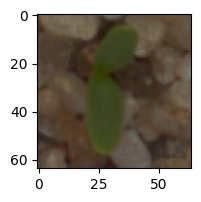

1/1 [==============================] - 0s 282ms/step
Predicted Label: ['Fat Hen']
True Label: Sugar beet


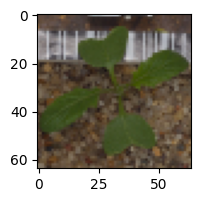

1/1 [==============================] - 0s 22ms/step
Predicted Label: ['Small-flowered Cranesbill']
True Label: Charlock


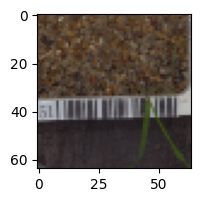

1/1 [==============================] - 0s 21ms/step
Predicted Label: ['Loose Silky-bent']
True Label: Black-grass


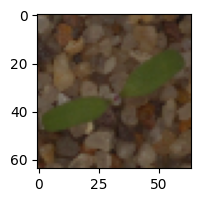

1/1 [==============================] - 0s 21ms/step
Predicted Label: ['Fat Hen']
True Label: Fat Hen


In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label:', enc.inverse_transform(model3.predict(X_test_normalized[2].reshape(1,64,64,3))))
print('True Label:', enc.inverse_transform(y_test_encoded)[2])

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label:', enc.inverse_transform(model3.predict(X_test_normalized[33].reshape(1,64,64,3))))
print('True Label:', enc.inverse_transform(y_test_encoded)[33])

plt.figure(figsize=(2,2))
plt.imshow(X_test[59])
plt.show()
print('Predicted Label:', enc.inverse_transform(model3.predict(X_test_normalized[59].reshape(1,64,64,3))))
print('True Label:', enc.inverse_transform(y_test_encoded)[59])

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label:', enc.inverse_transform(model3.predict(X_test_normalized[36].reshape(1,64,64,3))))
print('True Label:', enc.inverse_transform(y_test_encoded)[36])

### Visualizing the prediction

From the above the data and the pictorial representations of the the predicted verses acttual values that Model 2 (The Data Augmentation Model), most closely matches the train with the validation set.

## Actionable Insights and Business Recommendations

The rcommendation is to use model 2 (The Data Augmentation Model) rather than the transfer learning model using VGG16 as the CNN for classifying plant seedlings.

In [ ]:
!jupyter nbconvert --to html CV_8*_w_VGG16_full_code.ipynb

[NbConvertApp] Converting notebook CV_8__w_VGG16_full_code.ipynb to html
[NbConvertApp] Writing 3583314 bytes to CV_8__w_VGG16_full_code.html


*

_____